### Import Needed Packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import io
%matplotlib inline

### Downloading Data

In [6]:
!wget -O FuelConsumption2.csv https://raw.githubusercontent.com/jadijadi/machine_learning_with_python_jadi/main/FuelConsumption.csv

--2023-07-25 10:18:23--  https://raw.githubusercontent.com/jadijadi/machine_learning_with_python_jadi/main/FuelConsumption.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumption2.csv’

FuelConsumption2.cs 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2023-07-25 10:18:23 (2.78 MB/s) - ‘FuelConsumption2.csv’ saved [72629/72629]



### Reading the data in

In [9]:
df = pd.read_csv("FuelConsumption2.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head(4)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255


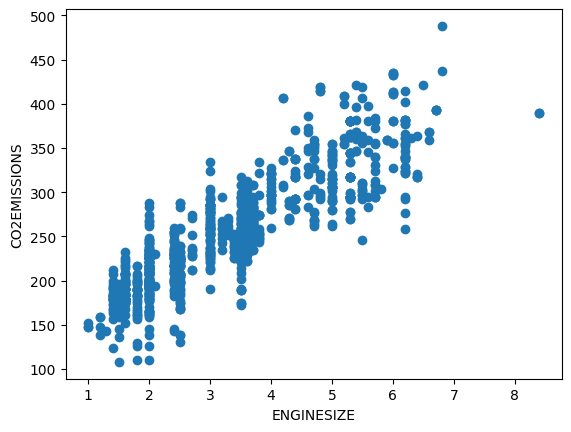

In [15]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

###`Train and Test distribution

In [16]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Multiple Regression Model

Coefficients:  [[ 9.65200953  7.58790338 10.25986004]] [61.36144118]


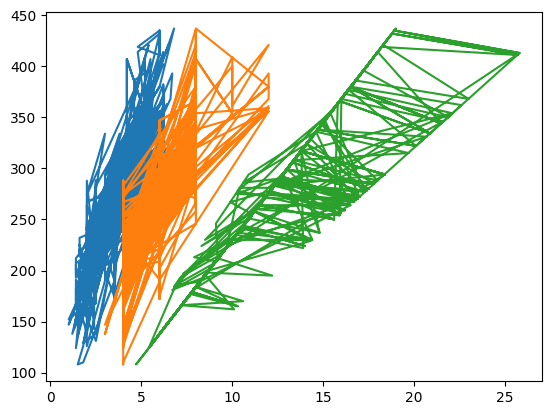

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(x,y)
print("Coefficients: " , regr.coef_ , regr.intercept_)


### Prediction

In [35]:
#y_hat = regr.predict(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
x_test = np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])
regr.score(x_test,y_test)


0.8392754334676098